# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [1]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss
%matplotlib inline

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

Text(0.5, 1.0, 'SEPARATE FIG 2 - Figure of fixed size')

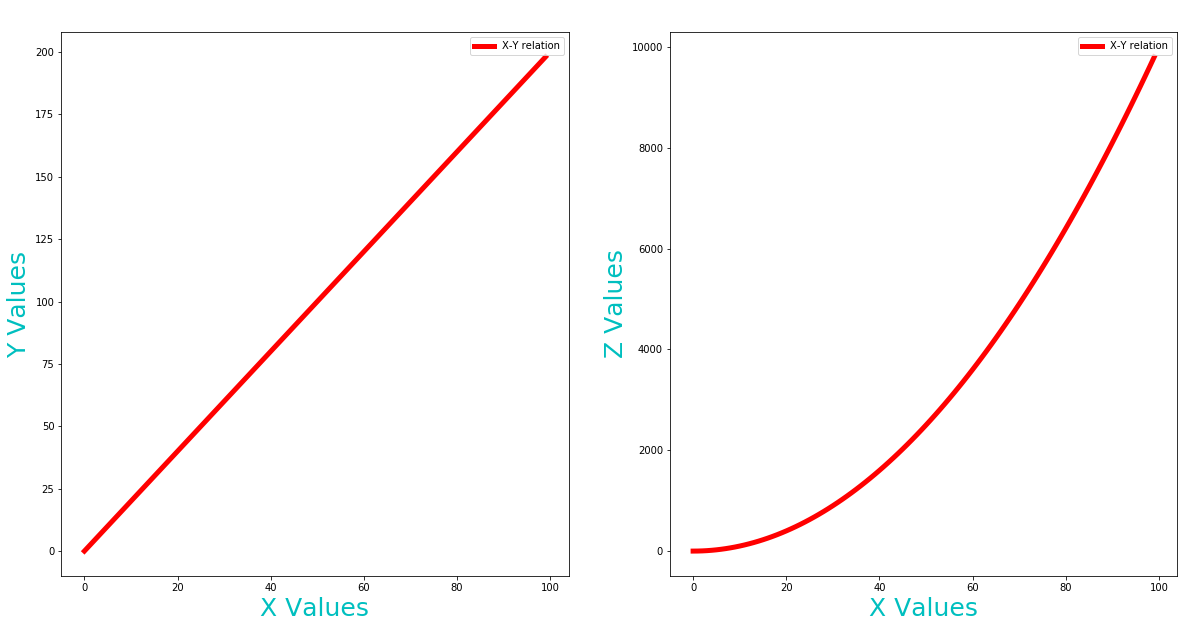

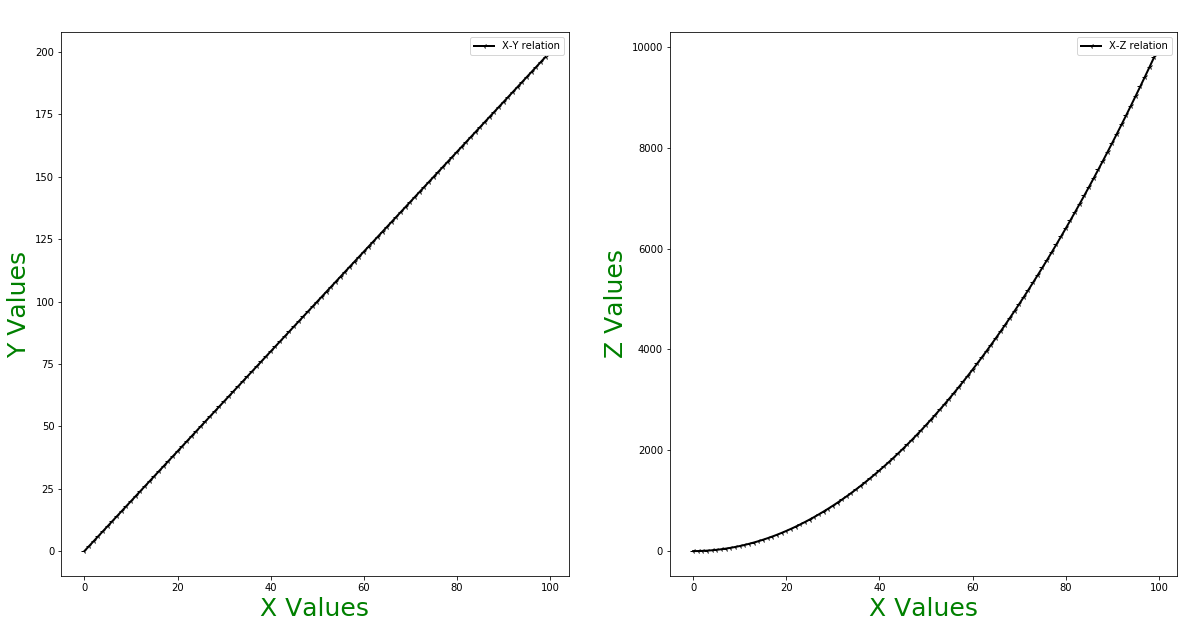

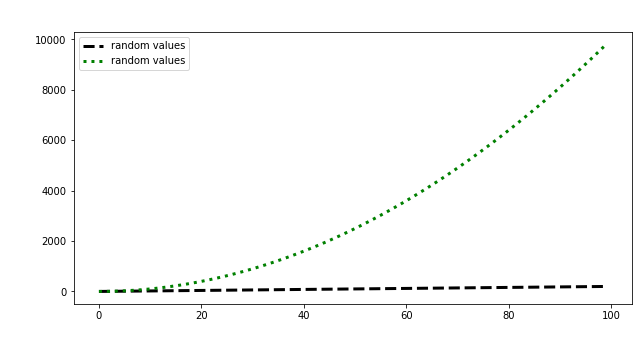

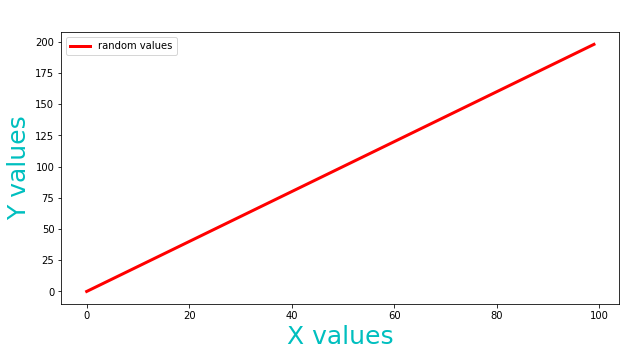

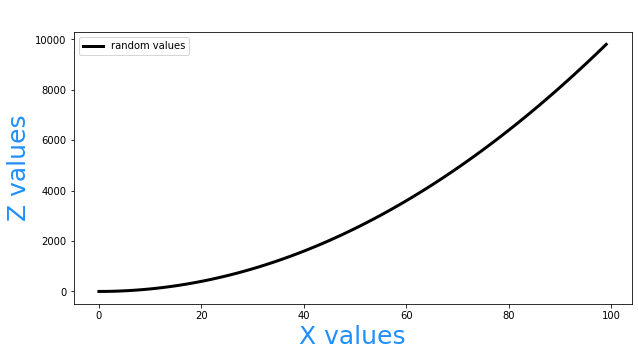

In [3]:
# OPTION 1 - TWO SUBPLOTS

# Create a figure of a fixed size
fig_1 = plt.figure(1,figsize=(20,10))

# First plot
chart_1 = fig_1.add_subplot(121)
chart_1.plot(x,y,label="X-Y relation",color="r",linewidth=5)
chart_1.set_xlabel("X Values",size=25,color="c")
chart_1.set_ylabel("Y Values",size=25,color="c")
chart_1.set_title('X-Y Figure',size=25,color="w")
chart_1.legend()

# Second plot
chart_2 = fig_1.add_subplot(122)
chart_2.plot(x,z,label="X-Y relation",color="r",linewidth=5)
chart_2.set_xlabel("X Values",size=25,color="c")
chart_2.set_ylabel("Z Values",size=25,color="c")
chart_2.set_title("X-Z Figure",size=25,color="w")
chart_2.legend()

# -------------------------------------------------------------------------------------------- #

# OPTION 2 - TWO SUBPLOTS V2.0

fig_2, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(x,y,label="X-Y relation",color="k",linewidth=2,marker="3")
axes[0].set_title("X-Y Figure",size=25,color="w")
axes[0].set_xlabel("X Values",size=25,color="g")
axes[0].set_ylabel("Y Values",size=25,color="g")
axes[0].legend()
axes[1].plot(x,z,label="X-Z relation",color="k",linewidth=2,marker="3")
axes[1].set_title("X-Z Figure",size=25,color="w")
axes[1].set_xlabel("X Values",size=25,color="g")
axes[1].set_ylabel("Z Values",size=25,color="g")
axes[0].legend()
axes[1].legend()


# -------------------------------------------------------------------------------------------- #

# OPTION 3 - ALL IN ONE FIGURE

plt.figure(figsize=(10,5))
plt.plot(x,y,"--k",x,z,":g",linewidth=3,label="random values")
plt.xlabel("X values",size=25,color="w")
plt.ylabel("Y and Z values",size=25,color="w")
plt.title("All in one",size=25,color="white")
plt.legend()

# ------------------------------------------------------------------------------------------ # 

# OPTION 4 - TWO SEPARATE FIGURES

# First plot
plt.figure(figsize=(10,5))
plt.plot(x,y,color="red",linewidth=3,label="random values")
plt.xlabel("X values",color="c",size=25)
plt.ylabel("Y values",color="c",size=25)
plt.legend()
plt.title("SEPARATE FIG 1 - Figure of fixed size",color="white",size=25)


# Second plot
plt.figure(figsize=(10,5))
plt.plot(x,z,color="k",linewidth=3,label="random values")
plt.xlabel("X values",color="dodgerblue",size=25)
plt.ylabel("Z values",color="dodgerblue",size=25)
plt.legend()
plt.title("SEPARATE FIG 2 - Figure of fixed size",color="white",size=25)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

In [4]:
# OPTION 2
# Create a figure of a fixed size and axes
# PlotsZ
# Show the plot

# THIS ONE IS ALREADY SOLVED ABOVE

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

'\nCan change, size,type,weight,width,labelpad of the text.\n'

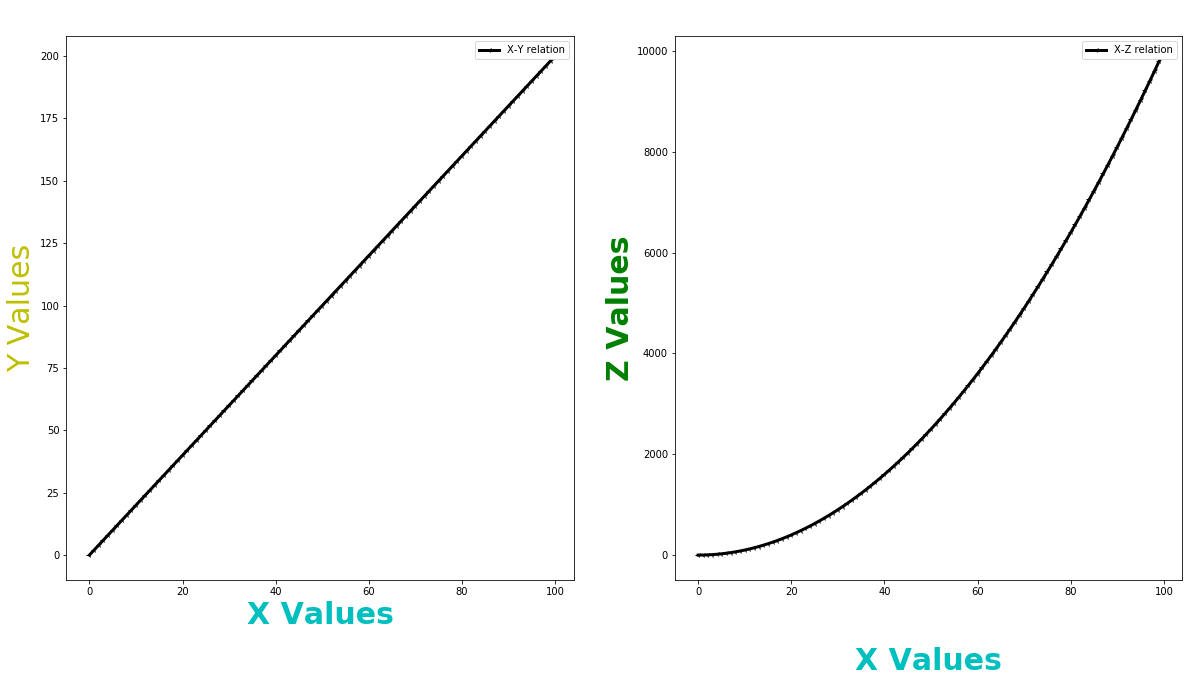

In [5]:
# ENHANCED VERSION to see more matplotlib features
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family("serif")
font.set_name("Times New Roman")
font.set_style("italic")

# Variables
fs = 30 # fontsize               #size || fontsize
fw = 700 # fontweight            #fontweight || weight
lw = 3 # lineweight              #linewidth ||
y_rot = 0 # ylabel rotation      #... couldn't find this...


# Create a figure of a fixed size and axes
fig_2, axes = plt.subplots(1,2,figsize=(20,10))


# First plot adding a title and x and y labels

axes[0].plot(x,y,label="X-Y relation",color="k",linewidth=lw,marker="3")
axes[0].set_title("X-Y Figure",fontweight=800,size=fs,color="w")
axes[0].set_xlabel("X Values",weight="bold",size=fs,color="c")
axes[0].set_ylabel("Y Values",size=fs,color="y")
axes[0].legend()

# Second plot adding a title and x and y labels

axes[1].plot(x,z,label="X-Z relation",color="k",linewidth=lw,marker="3")
axes[1].set_title("X-Z Figure",size=fs,fontweight=800,color="w",fontproperties=font)
axes[1].set_xlabel("X Values",fontsize=fs,color="c",fontweight=fw,labelpad=50)
axes[1].set_ylabel("Z Values",size=fs,color="g",weight="bold",labelpad=2)
axes[1].legend()

# Show the plot

'''
Can change, size,type,weight,width,labelpad of the text.
'''

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

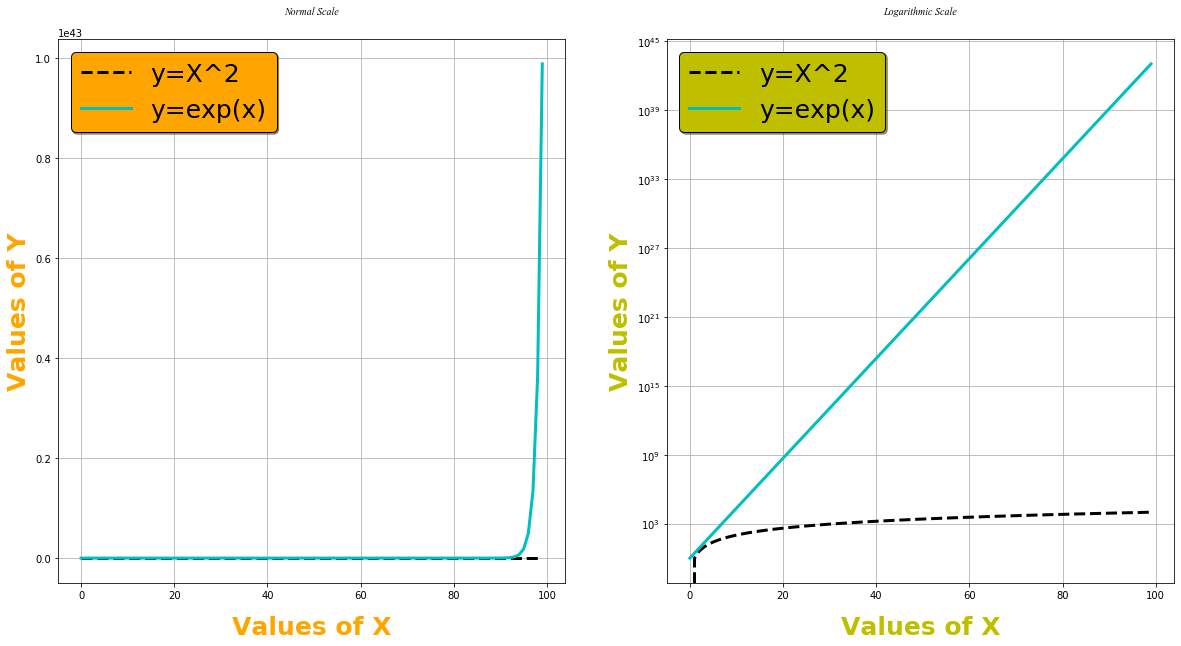

In [6]:
# Create a figure of a fixed size and axes
y1=x**2
y2= np.exp(x)

# Normal plot

fig4, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(x,y1,"--k",x,y2,"c",linewidth=3)
axes[0].set_xscale("linear")
axes[0].set_yscale("linear")
axes[0].set_xlabel("Values of X",size=25,fontweight="bold",labelpad=15,color="orange")
axes[0].set_ylabel("Values of Y",size=25,fontweight="bold",color="orange")
axes[0].set_title("Normal Scale",size=30,fontweight="bold",color="k",pad=25,fontproperties=font)
axes[0].legend(["y=X^2","y=exp(x)"],loc="upper left",
               fontsize=25,edgecolor="k",facecolor="orange",
              fancybox=True,shadow=True)
axes[0].grid(True)

# Logarithmic scale

axes[1].plot(x,y1,"--k",x,y2,"c",linewidth=3)
#axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel("Values of X",size=25,fontweight="bold",labelpad=15,color="y")
axes[1].set_ylabel("Values of Y",size=25,fontweight="bold",color="y")
axes[1].set_title("Logarithmic Scale",size=30,fontweight="bold",color="k",pad=25,fontproperties=font)
axes[1].legend(["y=X^2","y=exp(x)"],loc="upper left",fontsize=25,
               edgecolor="k",facecolor="y",
              frameon=True,shadow=True)
axes[1].grid(True)

In [7]:
# ALTERNATIVE WITH LEGEND
# Create a figure of a fixed size and axes
# Normal plot
# Logarithmic scale
# Show plot

'''
Done Above with Legends.
'''

#paolo: yes, very good! be careful when you choose
# colors, for example in legends the coloured background makes it difficoult to 
# make out the blue line
# Also very good that you label the axes and 

'\nDone Above with Legends.\n'

# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [9]:
# Read the data
import pandas as pd
fitbit = pd.read_csv("data/Fitbit2.csv")

In [10]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

[Text(0.0, 0, 'workday'), Text(0.2, 0, 'weekend')]

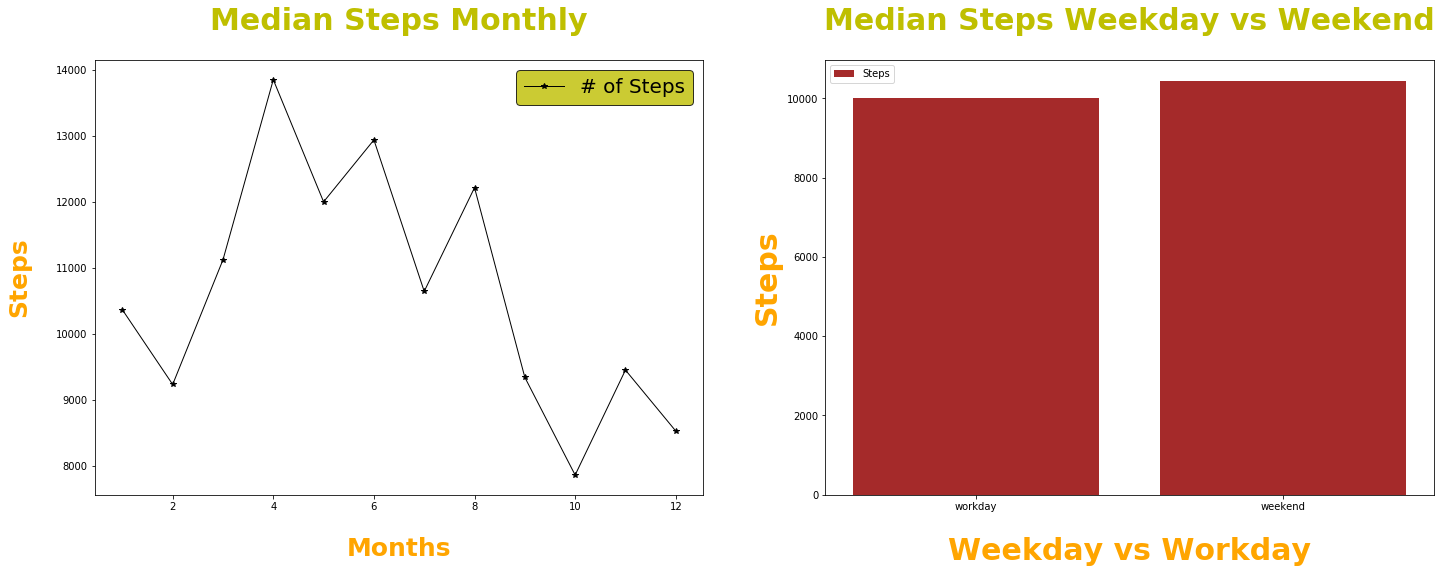

In [11]:
### MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month

each_month = fitbit.groupby("Months_encoded")[["Steps"]].median().reset_index()

# Create a figure of a fixed size and axes

fig6, axes = plt.subplots(1,2,figsize=(24,8))


# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
# Plot the weekday steps in the current axes
# Add labels, title, etc

# Only week days;

axes[0].plot(each_month["Months_encoded"],each_month["Steps"],
             linewidth=1,color="k",marker="*",label="# of Steps")
axes[0].set_xlabel("Months",size=25,color="orange",labelpad=25,fontweight="bold")
axes[0].set_ylabel("Steps",size=25,color="orange",labelpad=25,fontweight="bold")
axes[0].set_title("Median Steps Monthly",size=30,color="y",pad=30,fontweight="bold")
axes[0].legend(loc="upper right",fontsize=20,edgecolor="k",facecolor="y")

# Save the figure

fig6.savefig("Weekdays Steps.png")

# MEDIAN STEPS BY WORK_OR_WEEKEND
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
# Find the median steps for workdays and weekdays
# Plot the workday and weekend steps in the current axes
# Add labels, title, etc

each_week = fitbit.groupby("Work_or_Weekend")[["Steps"]].median().reset_index()

axes[1].bar(each_week["Work_or_Weekend"],each_week["Steps"],color="brown")
axes[1].set_title("Median Steps Weekday vs Weekend",size=30,color="y",pad=30,fontweight="bold")
axes[1].set_xlabel("Weekday vs Workday",size=30,color="orange",labelpad=25,fontweight="bold")
axes[1].set_ylabel("Steps",size=30,color="orange",labelpad=5,fontweight="bold")
axes[1].legend(["Steps"],loc='upper left',fontsize=10)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['workday','weekend'])

# Save the figure

#fig6.savefig("Median Steps Weekdays & MS Weekdays vs Weekends.png")

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

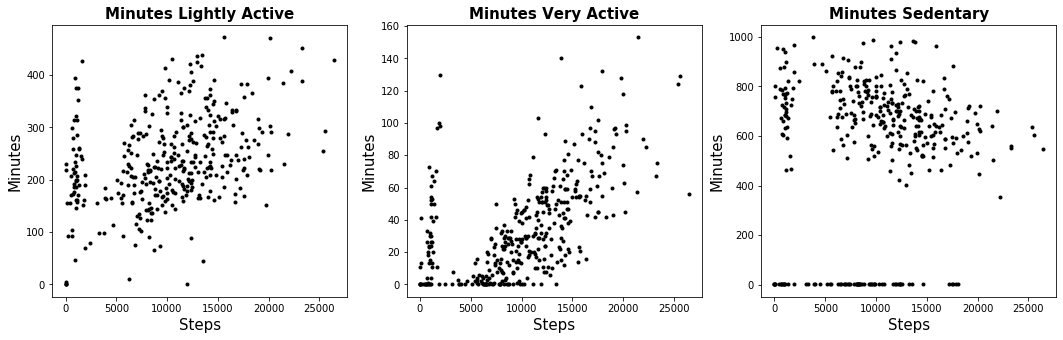

In [12]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 

filter_fitbit = fitbit[["Minutes Lightly Active","Minutes Very Active",
                        "Minutes Sedentary","Steps"]]

# Create a figure of a fixed size and axes

fig7, axes = plt.subplots(1,3,figsize=(18,5))

# Iterate to draw each scatter plot

for i in range(0,len(filter_fitbit.columns)-1):
    axes[i].scatter(filter_fitbit["Steps"],filter_fitbit.iloc[:,i],c="k",marker=".")
    axes[i].set_title(filter_fitbit.columns[i],fontweight="bold",size=15)
    axes[i].set_xlabel("Steps",size=15)
    axes[i].set_ylabel("Minutes",size=15)
    

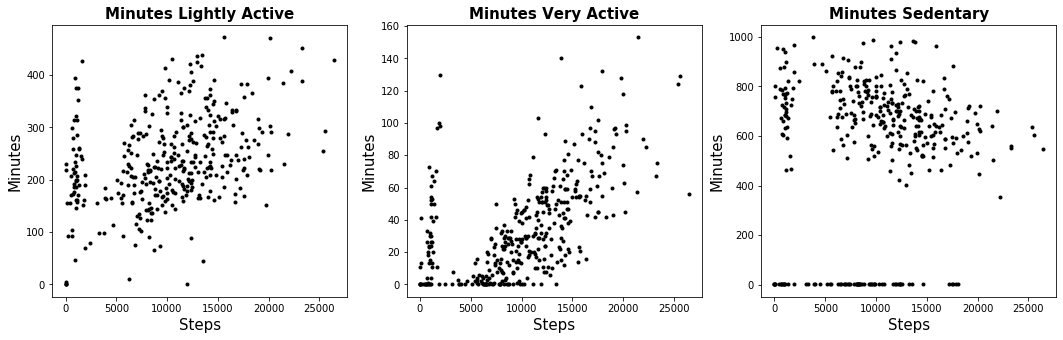

In [13]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 
filter_fitbit = fitbit[["Minutes Lightly Active","Minutes Very Active",
                        "Minutes Sedentary","Steps"]]

# Create a figure of a fixed size and axes

axes = ["axes1","axes2","axes3"]
fig8, axes = plt.subplots(1,3,figsize=(18,5))
for i in range(0,len(filter_fitbit.columns)-1):
    axes[i].scatter(fitbit["Steps"],filter_fitbit.iloc[:,i],c="k",marker=".")
    axes[i].set_title(filter_fitbit.columns[i],fontweight="bold",size=15)
    axes[i].set_xlabel("Steps",size=15)
    axes[i].set_ylabel("Minutes",size=15)

In [ ]:
#paolo: ok, very good!  there is really no difference between the two alternatives for  the last plot. Can you think of a
# different way to generate the last plot? For example, seaborn instead of matplotlib, list comprehension instead of
# looping or something else..
#paolo: in general when, like in this case, you need  to create a plot many times using a similar structure
# could be an idea to write a function for it